# 🚀 Startup Funding Analysis

This project explores startup funding data to uncover:
- Investment trends
- Top investors
- Most funded startups
- City-wise and industry-wise funding insights

We will clean, process, and visualize the data for insights that can help stakeholders understand the Indian startup ecosystem.


## 📂 Step 1: Load the Dataset

We import necessary libraries and load the dataset using Pandas to begin the analysis.


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('startup_funding.csv')
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


## 🧹 Step 2: Data Cleaning

In this section, we clean the dataset by:
- Renaming columns for consistency
- Handling missing values
- Cleaning the `Amount in USD` column (e.g., removing commas, converting 'undisclosed' to NaN)
- Standardizing city and industry names


In [31]:
print(df.columns.tolist())

['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical', 'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType', 'Amount in USD', 'Remarks']


In [33]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [35]:
df = df.rename(columns={'date_dd/mm/yyyy': 'date'})

In [37]:
df['amount_in_usd'] = df['amount_in_usd'].str.replace(',', '').str.strip()
df['amount_in_usd'] = pd.to_numeric(df['amount_in_usd'], errors='coerce')

In [39]:
df = df[df['amount_in_usd'].notnull()]

In [41]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year

In [43]:
df['industry_vertical'] = df['industry_vertical'].fillna('Unknown')
df['city__location'] = df['city__location'].fillna('Unknown')

## 📊 Step 3: Exploratory Data Analysis (EDA)

We perform an in-depth analysis to explore:
- Top funded startups
- Most active investors
- Funding trends over time
- City-wise funding distribution
- Industry-wise investment patterns


### Top 5 Funded Startups 

In [72]:
top_startups = df.groupby('startup_name')['amount_in_usd'].sum().sort_values(ascending=False).head(5)

### Top 5 investors by total investment

In [76]:
top_investors = df.groupby('investors_name')['amount_in_usd'].sum().sort_values(ascending=False).head(5)

### Top 5 most active investors

In [78]:
active_investors = df['investors_name'].value_counts().head(5)

### Top 5 industries by total investment

In [80]:
top_industries = df.groupby('industry_vertical')['amount_in_usd'].sum().sort_values(ascending=False).head(5)

# ------------ PLOTTING ------------ #

In [82]:
plt.figure(figsize=(15, 12))

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

### Plot 1: Top Funded Startups

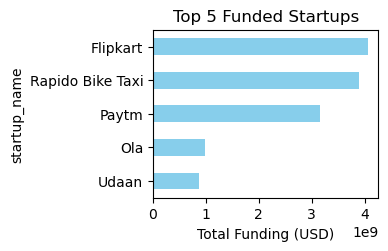

In [84]:
plt.subplot(2, 2, 1)
top_startups.plot(kind='barh', color='skyblue')
plt.title('Top 5 Funded Startups')
plt.xlabel('Total Funding (USD)')
plt.gca().invert_yaxis()

### Plot 2: Top Investors by Total Funding

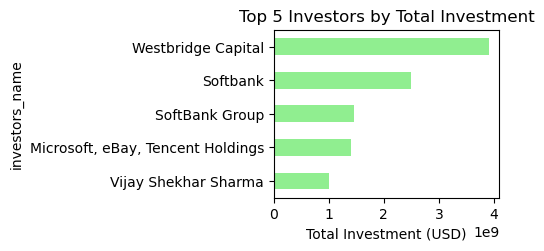

In [87]:
plt.subplot(2, 2, 2)
top_investors.plot(kind='barh', color='lightgreen')
plt.title('Top 5 Investors by Total Investment')
plt.xlabel('Total Investment (USD)')
plt.gca().invert_yaxis()

### Plot 3: Most Active Investors (Deal Count)

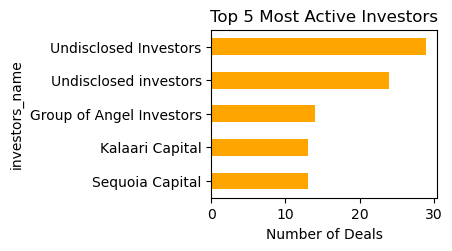

In [89]:
plt.subplot(2, 2, 3)
active_investors.plot(kind='barh', color='orange')
plt.title('Top 5 Most Active Investors')
plt.xlabel('Number of Deals')
plt.gca().invert_yaxis()

### Plot 4: Top Industries by Funding

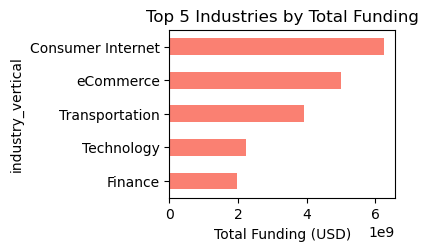

In [91]:
plt.subplot(2, 2, 4)
top_industries.plot(kind='barh', color='salmon')
plt.title('Top 5 Industries by Total Funding')
plt.xlabel('Total Funding (USD)')
plt.gca().invert_yaxis()

## Below are bar charts for each of the above metrics.

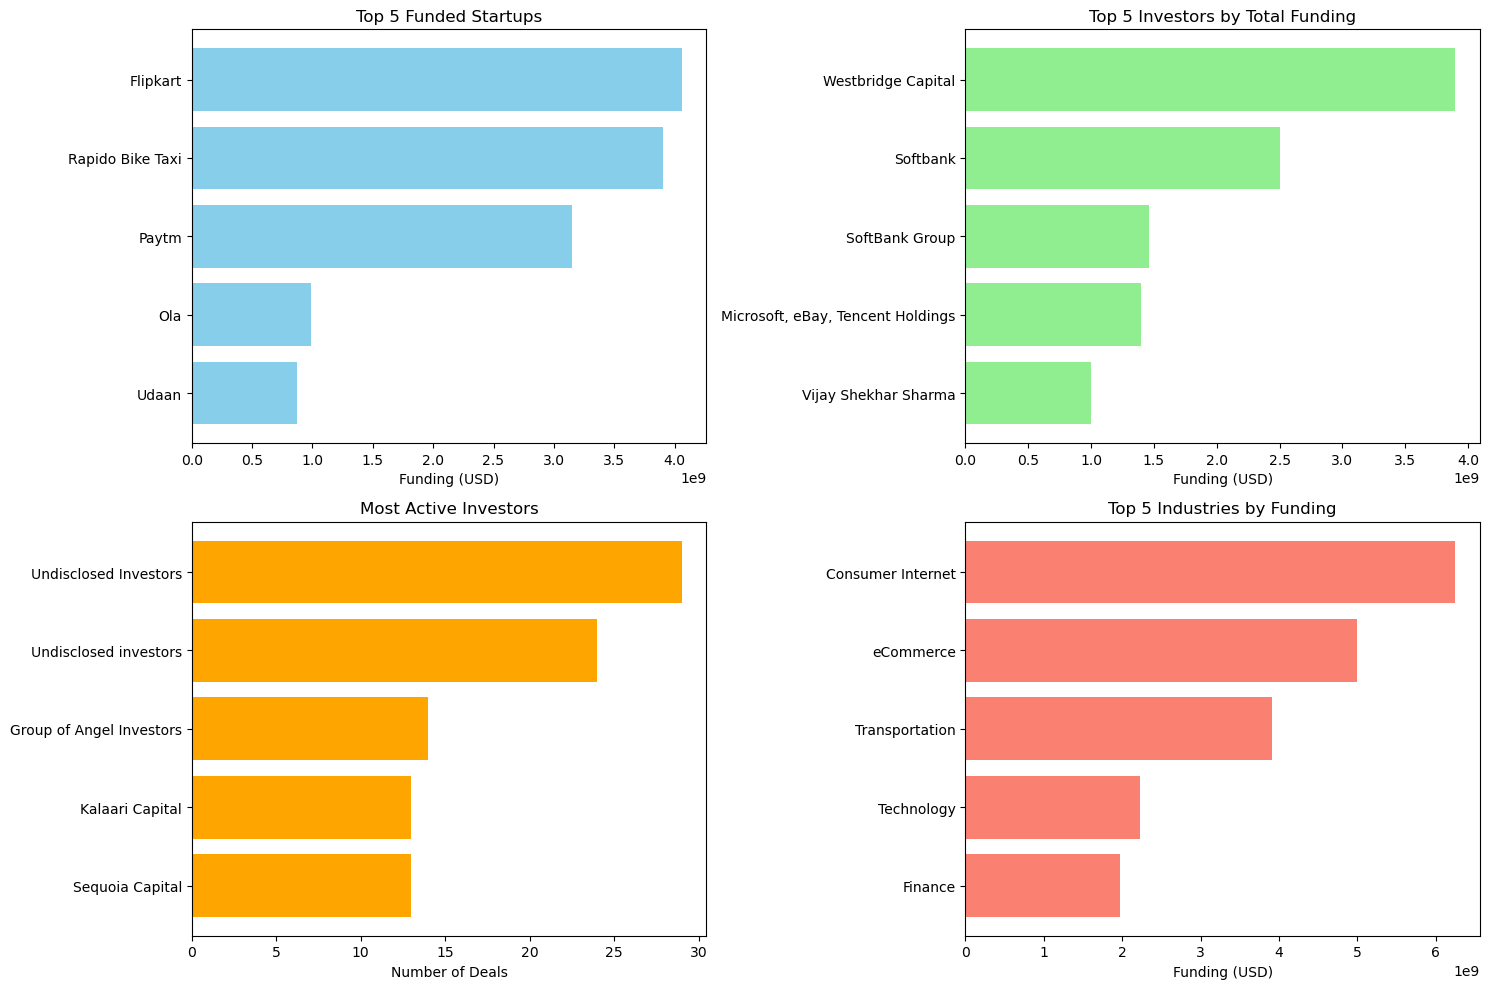

In [97]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1 - Funded Startups
axs[0, 0].barh(top_startups.index[::-1], top_startups.values[::-1], color='skyblue')
axs[0, 0].set_title("Top 5 Funded Startups")
axs[0, 0].set_xlabel("Funding (USD)")

# Plot 2 - Top Investors
axs[0, 1].barh(top_investors.index[::-1], top_investors.values[::-1], color='lightgreen')
axs[0, 1].set_title("Top 5 Investors by Total Funding")
axs[0, 1].set_xlabel("Funding (USD)")

# Plot 3 - Most Active Investors
axs[1, 0].barh(active_investors.index[::-1], active_investors.values[::-1], color='orange')
axs[1, 0].set_title("Most Active Investors")
axs[1, 0].set_xlabel("Number of Deals")

# Plot 4 - Top Industries
axs[1, 1].barh(top_industries.index[::-1], top_industries.values[::-1], color='salmon')
axs[1, 1].set_title("Top 5 Industries by Funding")
axs[1, 1].set_xlabel("Funding (USD)")

plt.tight_layout()
plt.show()